In [1]:
import maboss
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
sns.set_style("white")
colormap_scale = sns.light_palette("black", as_cmap=True)
colormap_ratios = sns.diverging_palette(240, 0, center='light', as_cmap=True)
def save_figure(figure, title):
    #figure.savefig("%s.png" % title, bbox_inches="tight")
    figure.savefig("%s.pdf" % title, bbox_inches="tight")

In [3]:
bnd = 'ICD_ExtendDy.bnd'
cfg = 'ICD_ExtendDy.cfg'
upp = 'ICD_ExtendDy.upp'

In [4]:
sim = maboss.load(bnd,cfg)
sim.print_bnd()

Node Tumor {


	rate_up = 0.0;
	rate_down = 0.0;
}
Node ChemoT {


	rate_up = 0.0;
	rate_down = $degChemo;
}

Node DyingTumor {


	rate_up = (Tumor & ChemoT) ? $effectChemo : 0.0 ;
	rate_down = 0.0 ;
}

Node DC {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node cd4 {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node cd8 {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node aDC {

	logic = (DC &  P2X7R);
	rate_up = @logic ? $u_aDC : 0.0;
	rate_down = 0.0;
}

Node cd4_Act {

	logic = (( IL2_rec | IL4_rec | (CD28 & TCR_II)) & cd4);
	rate_up = @logic ? $u_cd4_Act : 0.0;
	rate_down = @logic ? 0.0 : 0.0;
}

Node P2Y2R {

	logic = (DC);
	rate_up = @logic ? $u_P2Y2R : 0.0;
	rate_down = 0.0;
}

Node P2X7R {

	logic = (DC & P2Y2R);
	rate_up = @logic ? $u_P2X7R : 0.0;
	rate_down = 0.0;
}

Node FPR1 {

	logic = (aDC);
	rate_up = @logic ? $u_FPR1 : 0.0;
	rate_down = 0.0;
}

Node LRP1 {

	logic = (DC & FPR1);
	rate_up = @logic ? $u_LRP1 : 0.0;
	rate_down = 0.0;
}

Node TLR4 {

	logic = (aDC & LRP1 & FPR1);
	rate_up = 

In [5]:
initDC=0.1
initCd4=0.05
initCd8=0.05

In [6]:
sim.network.set_istate('Tumor',[initDC+initCd4+initCd8,1-initDC-initCd4-initCd8])
sim.network.set_istate('ChemoT',[initDC+initCd4+initCd8,1-initDC-initCd4-initCd8])
sim.network.set_istate('DC',[1-initDC,initDC])
sim.network.set_istate('cd4',[1-initCd4,initCd4])
sim.network.set_istate('cd8',[1-initCd8,initCd8])
sim.param['$degChemo'] = 1/(24*6)
sim.print_cfg()

$nb_mutable = 0;
$nb_mutable = 0;
$rate_ATP_i = 0.0;
$rate_CALR_i = 0.0;
$rate_HMGB1_i = 0.0;
$rate_ANXA1_i = 0.0;
$rate_IFN1_i = 0.0;
$rate_CXCL10_i = 0.0;
$rate_CD80_i = 0.0;
$rate_MHC_II_i = 0.0;
$rate_IL1B_i = 0.0;
$rate_IL2_i = 0.0;
$rate_IL4_i = 0.0;
$rate_IL6_i = 0.0;
$rate_IL12_i = 0.0;
$rate_IL17_i = 0.0;
$rate_IFNg_i = 0.0;
$rate_TGFb_i = 0.0;
$rate_MHC_I_i = 0.0;
$rate_perforin = 0.0;
$pop_Tumor = 0.0;
$clonal_exp_rate = 0.05;
$growth_tumor = 0.00001;
$ChemoEffect = 0.00002;
$PerforinDeath = 1/240;
$PerforinRecycled = 6;
$degChemo = 0.006944444444444444;
$effectChemo = 1;
$u_Tumor = 50;
$d_Tumor = 50;
$u_DC = 50;
$d_DC = 50;
$u_aDC = 50;
$d_aDC = 50;
$u_cd4 = 50;
$d_cd4 = 50;
$u_cd8 = 50;
$d_cd8 = 50;
$u_Th1 = 50;
$d_Th1 = 50;
$u_Th2 = 50;
$d_Th2 = 50;
$u_Th17 = 50;
$d_Th17 = 50;
$u_Treg = 50;
$d_Treg = 50;
$u_preCTL = 50;
$d_preCTL = 50;
$u_CTL = 5/12;
$d_CTL = 50;
$u_CD28 = $rate_CD80_i/6;
$d_CD28 = 50;
$u_CXCR3 = $rate_CXCL10_i/6;
$d_CXCR3 = 50;
$u_FPR1 = $rate_ANXA1_i/6;

In [7]:
WT = maboss.UpdatePopulation(sim,upp)


In [8]:
start = time.time()
WT_res = WT.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  1.2642828305562337  mins


In [9]:
nodes=('Tumor','DC','aDC','cd4','cd8','Th1','Th2','Th17','Treg','preCTL','CTL','CALR_o','HMGB1_o','Perforin_o')

In [10]:
WT_table = WT_res.get_nodes_stepwise_probability_distribution(nodes)

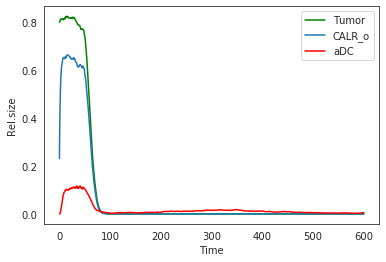

In [11]:
adc = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['Tumor'],'-g',label="Tumor")
plt.plot(WT_table['PopRatio']*WT_table['CALR_o'],'-',label="CALR_o")
plt.plot(WT_table['PopRatio']*WT_table['aDC'],'-r',label="aDC")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(adc,"aDC_Tumor_CALR")

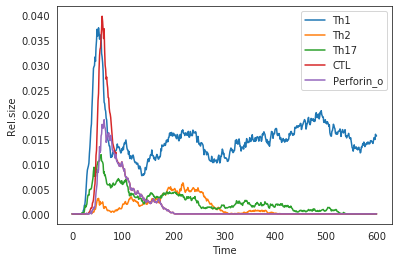

In [12]:
Tcells = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['Th1'],label="Th1")
plt.plot(WT_table['PopRatio']*WT_table['Th2'],label="Th2")
plt.plot(WT_table['PopRatio']*WT_table['Th17'],label="Th17")
plt.plot(WT_table['PopRatio']*WT_table['CTL'],label="CTL")
plt.plot(WT_table['PopRatio']*WT_table['Perforin_o'],label="Perforin_o")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(Tcells,"Tcells")

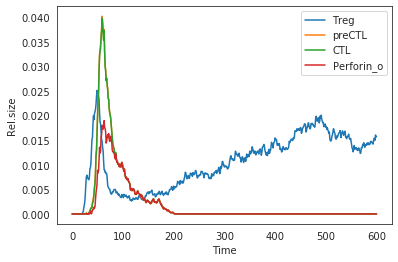

In [13]:
NTcells = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['Treg'],label="Treg")
plt.plot(WT_table['PopRatio']*WT_table['preCTL'],label="preCTL")
plt.plot(WT_table['PopRatio']*WT_table['CTL'],label="CTL")
plt.plot(WT_table['PopRatio']*WT_table['Perforin_o'],label="Perforin_o")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(NTcells,"other_Tcells")

 __Higher initial DC population__  (i.e. $\text{initial pop}\cdot 1.5$)

In [14]:
HighDC_sim = maboss.load(bnd,cfg)
HighDC_sim.param['$InitDC'] = 0.15
initDC=0.15
initCd4=0.05
initCd8=0.05

HighDC_sim.network.set_istate('Tumor',[initDC+initCd4+initCd8,1-initDC-initCd4-initCd8])
HighDC_sim.network.set_istate('ChemoT',[initDC+initCd4+initCd8,1-initDC-initCd4-initCd8])
HighDC_sim.network.set_istate('DC',[1-initDC,initDC])
HighDC_sim.network.set_istate('cd4',[1-initCd4,initCd4])
HighDC_sim.network.set_istate('cd8',[1-initCd8,initCd8])

HighDC = maboss.UpdatePopulation(HighDC_sim,upp)

In [15]:
start = time.time()
HighDC_res = HighDC.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  1.450850248336792  mins


In [16]:
HighDC_table = HighDC_res.get_nodes_stepwise_probability_distribution(nodes)

__Low DC population__ (i.e. $\text{initial pop}/ 1.5$)

In [17]:
LowDC_sim = maboss.load(bnd,cfg)
LowDC_sim.param['$InitDC'] = 0.067

initDC=0.067
initCd4=0.05
initCd8=0.05

LowDC_sim.network.set_istate('Tumor',[initDC+initCd4+initCd8,1-initDC-initCd4-initCd8])
LowDC_sim.network.set_istate('ChemoT',[initDC+initCd4+initCd8,1-initDC-initCd4-initCd8])
LowDC_sim.network.set_istate('DC',[1-initDC,initDC])
LowDC_sim.network.set_istate('cd4',[1-initCd4,initCd4])
LowDC_sim.network.set_istate('cd8',[1-initCd8,initCd8])
LowDC = maboss.UpdatePopulation(LowDC_sim,upp)


In [18]:
start = time.time()
LowDC_res = HighDC.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  1.508527441819509  mins


In [19]:
LowDC_table = LowDC_res.get_nodes_stepwise_probability_distribution(nodes)

__Faster Clonal expansion__ (i.e. $\text{initial pop}\cdot 1.5$)

In [20]:
FastClonal_sim = maboss.load(bnd,cfg)
FastClonal_sim.param['$clonal_exp_rate'] = 0.075


initDC=0.1
initCd4=0.05
initCd8=0.05

FastClonal_sim.network.set_istate('Tumor',[initDC+initCd4+initCd8,1-initDC-initCd4-initCd8])
FastClonal_sim.network.set_istate('ChemoT',[initDC+initCd4+initCd8,1-initDC-initCd4-initCd8])
FastClonal_sim.network.set_istate('DC',[1-initDC,initDC])
FastClonal_sim.network.set_istate('cd4',[1-initCd4,initCd4])
FastClonal_sim.network.set_istate('cd8',[1-initCd8,initCd8])


FastClonal = maboss.UpdatePopulation(FastClonal_sim,upp)

In [21]:
start = time.time()
FastClonal_res = FastClonal.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  1.48511616786321  mins


In [22]:
FastClonal_table = FastClonal_res.get_nodes_stepwise_probability_distribution(nodes)

__Slower Clonal expansion__ (i.e. $\text{initial pop} / 1.5$)

In [23]:
SlowClonal_sim = maboss.load(bnd,cfg)
SlowClonal_sim.param['$clonal_exp_rate'] = 0.033

initDC=0.1
initCd4=0.05
initCd8=0.05

SlowClonal_sim.network.set_istate('Tumor',[initDC+initCd4+initCd8,1-initDC-initCd4-initCd8])
SlowClonal_sim.network.set_istate('ChemoT',[initDC+initCd4+initCd8,1-initDC-initCd4-initCd8])
SlowClonal_sim.network.set_istate('DC',[1-initDC,initDC])
SlowClonal_sim.network.set_istate('cd4',[1-initCd4,initCd4])
SlowClonal_sim.network.set_istate('cd8',[1-initCd8,initCd8])
                                  
SlowClonal = maboss.UpdatePopulation(SlowClonal_sim,upp)

In [24]:
start = time.time()
SlowClonal_res = SlowClonal.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  1.4711871981620788  mins


In [25]:
SlowClonal_table = SlowClonal_res.get_nodes_stepwise_probability_distribution(nodes)

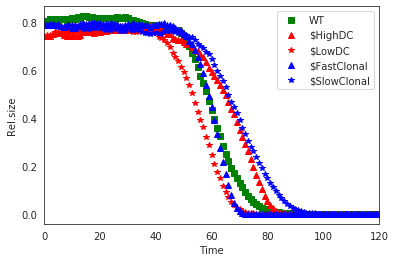

In [26]:
mutants_vs_WT = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['Tumor'],"sg",label="WT")
plt.plot(HighDC_table['PopRatio']*HighDC_table['Tumor'],"^r",label="$HighDC")
plt.plot(LowDC_table['PopRatio']*LowDC_table['Tumor'],"*r",label="$LowDC")
plt.plot(FastClonal_table['PopRatio']*FastClonal_table['Tumor'],"^b",label="$FastClonal")
plt.plot(SlowClonal_table['PopRatio']*SlowClonal_table['Tumor'],"*b",label="$SlowClonal")

plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.xlim(left=0, right=120)
plt.legend()
save_figure(mutants_vs_WT,"mutants_vs_WT")
